 **1.Your views about about problem statements?**
Ans:Ans: The given is about to find the continuos variable value i.e.salary , with the help of historical data
So that for finding the value we are going to use various regression models such as simple linear regression,ridge regression,Lasso regression,boosting tree,simple tree, random forest regression etc.
with the help of all these models we can predict salary and correlation of CTC with different factors.




2.**What will be your approach to solving the problem?**
Ans:My first approach was to understanding the problem statement ,
Then1)I loading the data and arranged it in a right format: in this step i used google colab to connect it I used google drive to connect data files into it ,
2)Then I converted columns records like colleges and cities into their respective categories.
3)Data preprocessing :In this step i look for missing values and outliers and high correlation variables.
4)Train and Test : In this i divide my file records in 80:20 random ratio so it evaluate file further 5) Then I build all 9 model of theory lecture 6)in this step we have to check performance of model and use it for prediction.

**3. What were the available ML model options you had to perform this task?**
Ans: For me the best model available to perform the task are as follow:
1.   linear regression
2.   simple regression decision tree
3.   Bagging decision tree model
4.   Random forest decision tree model
5.   Gradient boosting decision tree model
6.   Adaboosting decision tree model
7.   XG Boosting decision tree model
8.   lasso regression
9.   ridge regression

**4. Which model’s performance is best and what could be the possible reason for that?**
Ans: In this case the best performance is given by **Ada(adaptive) Boosting** regression because it gives the highest r2 value which is 0.667 and 0.95 of test and train data respectively,root_mean_square value also less which is 7019.972 by comparing all 9 model it gives best values because r2 value tells variablility in dependent value y explained by independent value x.so it explained best.MSE of test tells amount of error generated in model. difference in both r2 tells overfitting also less compare to ther model.

**5. What steps can you take to improve this selected model’s performance even further?**
Ans:To improve the performance of model we take following steps:
a)**By using GridsearchCV** for this model we should improve its performance.
because with different parameters model we would select best one with high performance.
b)**Using cross validation technique:** it can help to generalize the model and reduce the overfiting
c)**by using target variable**: we can decrease number of variables which are highly correlated and more p value . i did not eliminate because not having large amount of variables.if we did it would certainly improve performance by atleast little amount.

#**MOUNTING** **DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**LOADING AND PREPROCESSING**

In [ ]:
path_city='/content/drive/MyDrive/Colab Notebooks/cities.csv'               ### path of city file
path_college='/content/drive/MyDrive/Colab Notebooks/Colleges.csv'          ### path of college file
path_df='/content/drive/MyDrive/Colab Notebooks/ML case Study.csv'          ### path of ML case study file

In [ ]:
import numpy as np                              ### importing numpy,seaborn,pandas and gridsearchCV
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv(path_df)      ### importing ML case study file

In [ ]:
df1 = df[df.duplicated()]    ### finding duplicates
print(len(df1))

0


In [ ]:
df.shape     ### finding diamension of file

(1589, 8)

In [ ]:
df.head()    ### finding first five record of df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
college_data=pd.read_csv(path_college)    ### importing college_data file

In [ ]:
college_data.rename(columns = {'Tier 1':'Tier1', 'Tier 2':'Tier2', 'Tier 3':'Tier3'}, inplace = True) ### renaming columns in python

In [ ]:
college_data.head() ### it shows first 5 records of college_data

,Tier1,Tier2,Tier3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
cities_data=pd.read_csv(path_city) ### importing cities_data file

In [ ]:
cities_data.rename(columns = {'Metrio City':'metro', 'non-metro cities':'nonmetro'}, inplace = True)  ### renaming columns of cities_data

In [ ]:
cities_data.head() ### it show 5 records of cities_data

,metro,nonmetro
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [ ]:
Tier1=college_data["Tier1"].tolist()    #### creating list from college_data columns
Tier2=college_data["Tier2"].tolist()
Tier3=college_data["Tier3"].tolist()

In [ ]:
metro=cities_data["metro"].tolist()      #### creating list from cities_data columns
non_metro=cities_data["nonmetro"].tolist()





In [ ]:
Tier1 ### it shows tier1 college list

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
Tier2 ### it shows tier2 college list

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [ ]:
Tier3   ### it shows Tier3 college list

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
metro  #### it shows metro cities list

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [ ]:
non_metro  ### it shows non_metro cities list

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

In [ ]:
print(len(metro), len(non_metro))  ### shows number of records in list

9 9


In [ ]:
print(len(Tier1), len(Tier2), len(Tier3)) ### shows number of records in list

28 28 28


In [ ]:
for item in df.College:    ### assigns category to the names of record
    if item in Tier1:
        df["College"].replace(item,"Tier1", inplace=True)
    elif item in Tier2:
        df["College"].replace(item,"Tier2", inplace=True)
    elif item in Tier3:
        df["College"].replace(item,"Tier3", inplace=True)


In [ ]:
df.shape ### it shows diamensions

(1589, 8)

In [ ]:
df.head() ### it shows first five records

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,Tier2,Asansol,Manager,55523.0,3,66,19,71406.58
1,Tier2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,Tier3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,Tier3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,Tier1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
for item in df.City: ### assigns the category to the names of records
    if item in metro:
        df["City"].replace(item,"metro", inplace=True)
    elif item in non_metro:
        df["City"].replace(item,"nonmetro", inplace=True)



In [ ]:
df.head() ### shows the first five records of list

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,Tier2,nonmetro,Manager,55523.0,3,66,19,71406.58
1,Tier2,nonmetro,Executive,57081.0,1,84,18,68005.87
2,Tier3,nonmetro,Executive,60347.0,2,52,28,76764.02
3,Tier3,nonmetro,Executive,49010.0,2,81,33,82092.39
4,Tier1,nonmetro,Executive,57879.0,4,74,32,73878.10


In [ ]:
df1 = df[df.duplicated()] #### finding duplicates
print(len(df1))

46


In [ ]:
df=pd.get_dummies(df)    ### creating numerical variable from categorical data using n_hot_encoding

In [ ]:
df.head(2)  ### first two records of df data frame to look dummies

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_Tier2,College_Tier3,City_metro,City_nonmetro,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,1,0,0,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,0,1,1,0


In [ ]:
del df["College_Tier3"]   ### deleting  unrequired elements to implement (n-1) rule
del df["City_nonmetro"]
del df["Role_Executive"]



In [ ]:
df.head(2) ### it shows first two records of df data frame

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_Tier2,City_metro,Role_Manager
0,55523.0,3,66,19,71406.58,0,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,0


###Result
1.Loaded data in df variable
2.college,Role and City columns converted into required numeric field

In [ ]:
### Creating dependent and independent variable
x=df.loc[:,df.columns!='CTC']
y=df["CTC"]

In [ ]:
### it shows first five records of x variable
x.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_Tier1,College_Tier2,City_metro,Role_Manager
0,55523.0,3,66,19,0,1,0,1
1,57081.0,1,84,18,0,1,0,0
2,60347.0,2,52,28,0,0,0,0
3,49010.0,2,81,33,0,0,0,0
4,57879.0,4,74,32,1,0,0,0


In [ ]:
### Shows first five record of y variable
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [ ]:
### NO missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   College_Tier1        1589 non-null   uint8  
 6   College_Tier2        1589 non-null   uint8  
 7   City_metro           1589 non-null   uint8  
 8   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 68.4 KB


In [ ]:
#### univariate values of variables
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_Tier2,City_metro,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.363751,0.297042,0.514160,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.481230,0.457099,0.499957,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000


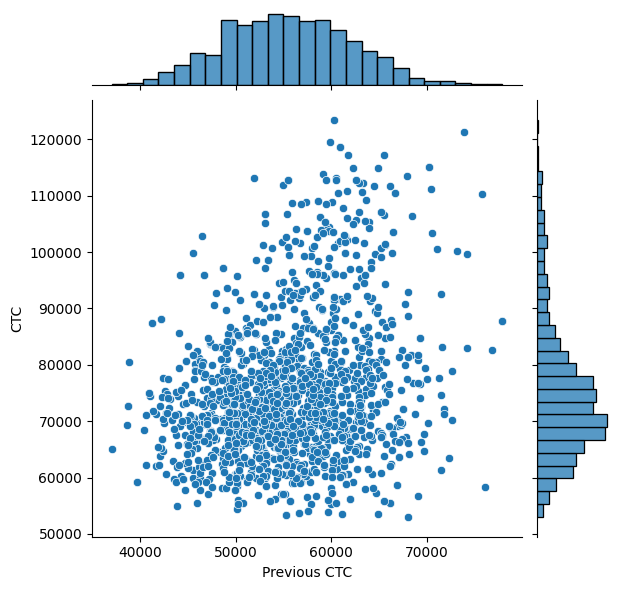

In [ ]:
### creating jointplot of 'Previous CTC' vs 'CTC'
sns.jointplot(x='Previous CTC', y='CTC', data=df)

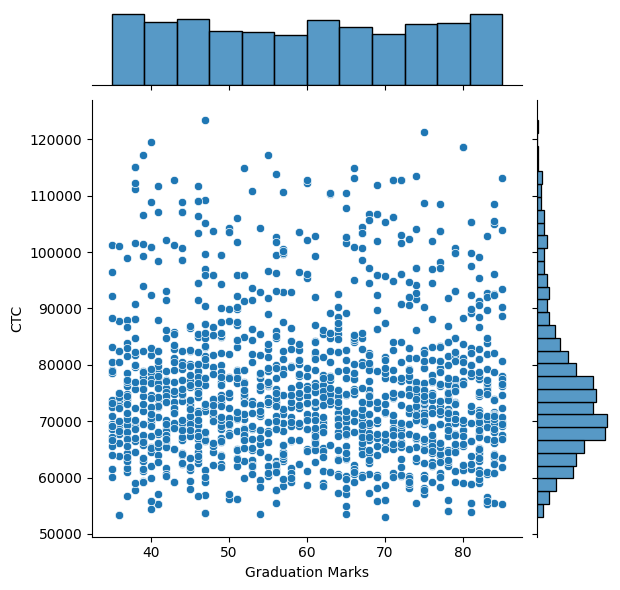

In [ ]:
### creating jointplot between 'Graduation Marks' and 'CTC'
sns.jointplot(x='Graduation Marks', y='CTC', data=df)

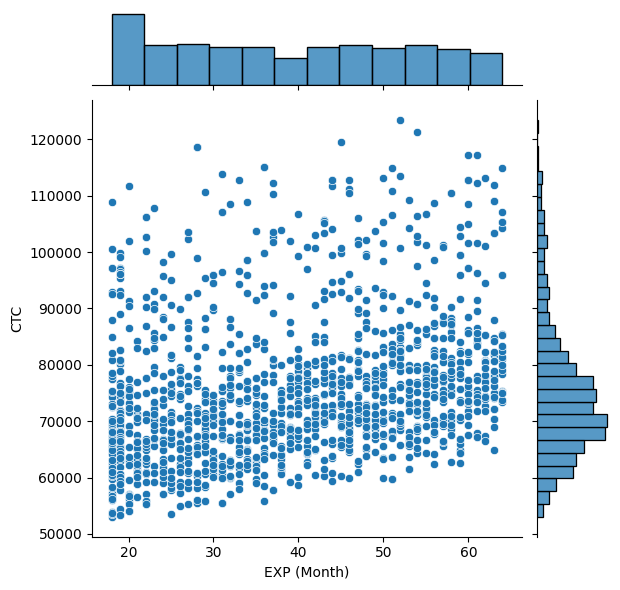

In [ ]:
### creating jointplot between 'EXP (Month)' and 'CTC'
sns.jointplot(x='EXP (Month)', y='CTC', data=df)

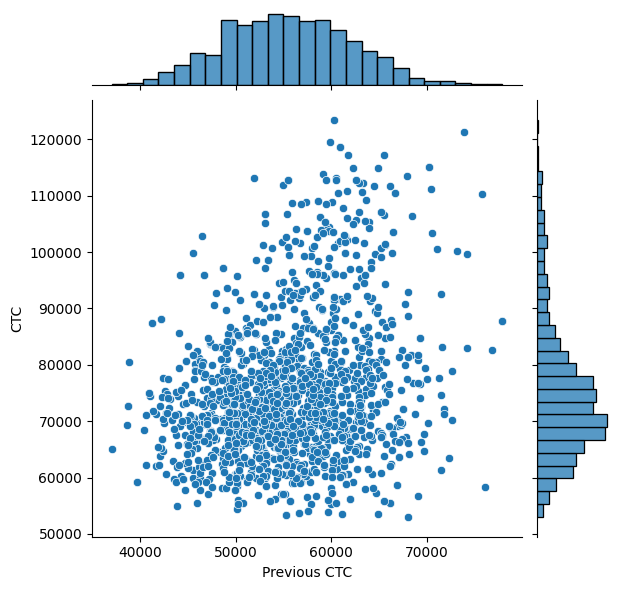

In [ ]:
#### Creating jointplot between 'Previous CTC' and 'CTC'
sns.jointplot(x='Previous CTC', y='CTC', data=df)

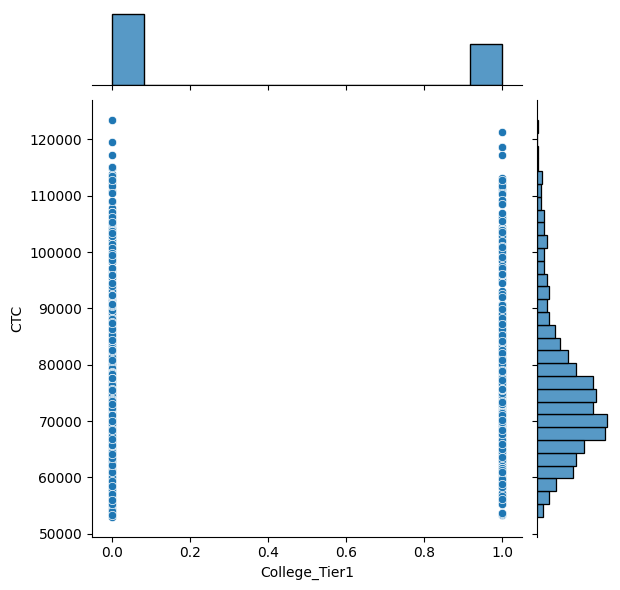

In [ ]:
#### Creating jointplot between 'College_Tier1' and 'CTC'
sns.jointplot(x='College_Tier1', y='CTC', data=df)

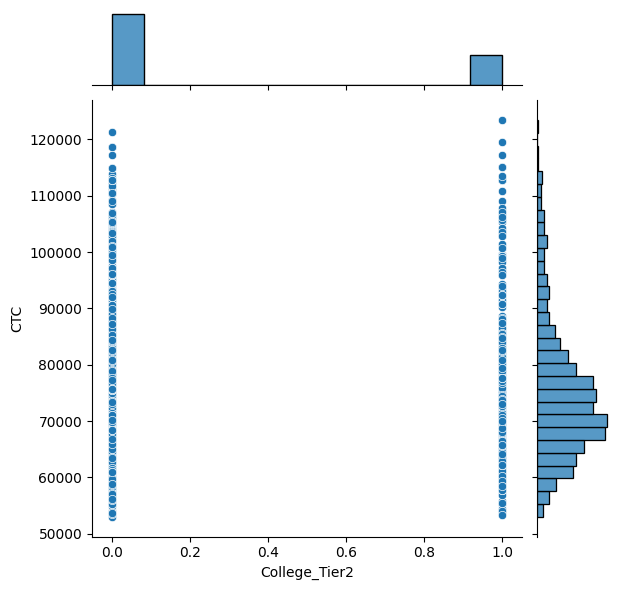

In [ ]:
#### Creating jointplot between 'College_Tier2' and 'CTC'
sns.jointplot(x='College_Tier2', y='CTC', data=df)

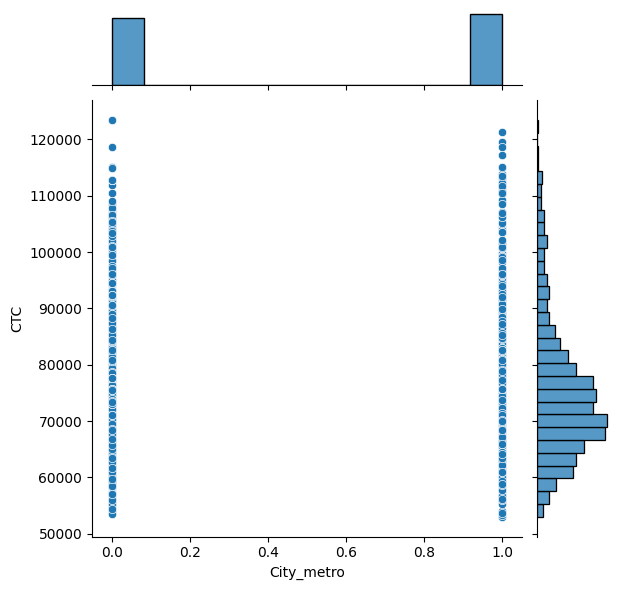

In [ ]:
#### Creating jointplot between 'City_metro' and 'CTC'
sns.jointplot(x='City_metro', y='CTC', data=df)

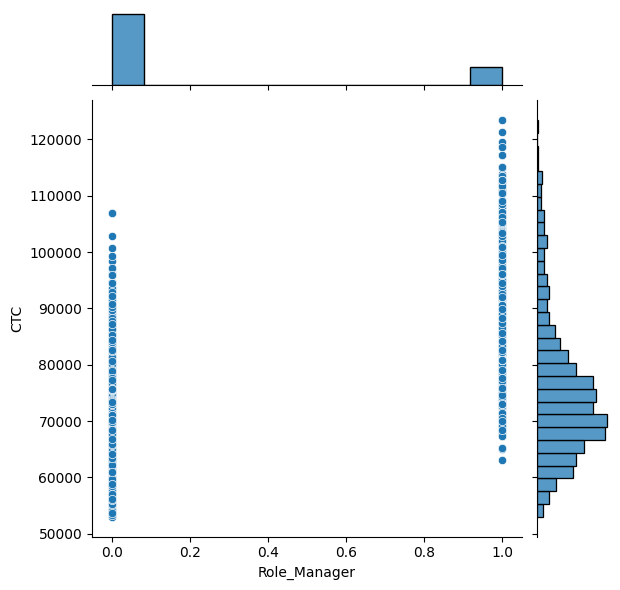

In [ ]:
#### Creating jointplot between 'Role_Manager' and 'CTC'
sns.jointplot(x='Role_Manager', y='CTC', data=df)

In [ ]:
### it shows correlation between variables
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_Tier2,City_metro,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.031366,-0.010947,0.004644,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.045931,0.004271,0.051670,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.005666,-0.018419,-0.018616,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.003323,-0.014558,-0.023613,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.019912,0.012346,-0.020365,0.621311
College_Tier1,-0.031366,0.045931,0.005666,-0.003323,0.019912,1.000000,-0.491510,0.002135,0.015158
College_Tier2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,-0.491510,1.000000,0.022917,-0.004865
City_metro,0.004644,0.051670,-0.018616,-0.023613,-0.020365,0.002135,0.022917,1.000000,-0.048671
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,0.015158,-0.004865,-0.048671,1.000000


In [ ]:
#### it shows first five records of college_data
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_Tier2,City_metro,Role_Manager
0,55523.0,3,66,19,71406.58,0,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,0
2,60347.0,2,52,28,76764.02,0,0,0,0
3,49010.0,2,81,33,82092.39,0,0,0,0
4,57879.0,4,74,32,73878.10,1,0,0,0


In [ ]:
### shows the list of Tier3 colleges
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
### shows the list of metro cities
metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [ ]:
### shows the list of non_metro cities
non_metro

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

###**Result**

1.   No missing values found df.info()
2.   No outliers in data as seen from graphs and df.describe()
3.   Converted categorical into numeric field using n-hot encoding
4.   No Duplicates found in data from df1.



#### Splitting Data into Train-Test sample

In [ ]:

from sklearn.model_selection import train_test_split                                    ###importing modul/package of test_train_split
x_train,x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)  ###creating  test, train variables
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)                         ### finding diamensions of variable

(1271, 8) (318, 8) (1271,) (318,)


##### statsmodels

In [ ]:
import statsmodels.api as sn        ### importing statsmodel
x_const=sn.add_constant(x_train)    ### creating constant variable x

In [ ]:
x_const.head(2) ### shoing first two records



,const,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_Tier1,College_Tier2,City_metro,Role_Manager
1062,1.0,61410.0,4,83,59,1,0,0,1
215,1.0,59781.0,1,46,41,1,0,1,0


In [ ]:
lm=sn.OLS(y_train,x_const).fit() ## creating model object

In [ ]:
lm.summary() #### getting summary of linear_regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     180.4
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          7.12e-203
Time:                        12:37:17   Log-Likelihood:                -13327.
No. Observations:                1271   AIC:                         2.667e+04
Df Residuals:                    1262   BIC:                         2.672e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.56e+04   2434.719     14.621      0.000    3.08e+04    4.04e+04
Previous CTC            0.4296      0.037     11.632      0.000       0.357       0.502
Previous job change    91.6241    218.632      0.419      0.675    -337.299     520.547
Graduation Marks       10.1810     16.392      0.621      0.535     -21.978      42.340
EXP (Month)           257.8025     17.473     14.754      0.000     223.523     292.082
College_Tier1         800.7768    583.187      1.373      0.170    -343.347    1944.900
College_Tier2         939.0438    612.572      1.533      0.126    -262.727    2140.815
City_metro            914.5279    489.631      1.868      0.062     -46.053    1875.109
Role_Manager         1.925e+04    602.340     31.963      0.000    1.81e+04    2.04e+04
==============================================================================
Omnibus:                       42.715   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.545
Skew:                           0.424   Prob(JB):                     4.74e-11
Kurtosis:                       3.424   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression ### importing linear regression object
lm=LinearRegression()                  ### creating linear regression object

In [ ]:
### fitting x_train and y_train on linear regression data
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_, lm.coef_) ### finding intercept and coefficient of linear regreesion model

35598.39462827076 [4.29560583e-01 9.16241174e+01 1.01809891e+01 2.57802465e+02
 8.00776831e+02 9.39043793e+02 9.14527889e+02 1.92527381e+04]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error ### importing r2_score from sklearn

In [ ]:
###predictin x and y variables
y_test_a= lm.predict(x_test)
y_train_a= lm.predict(x_train)

In [ ]:
r2_score(y_test, y_test_a) ###R2 of test

0.5366674761765405

In [ ]:
r2_score(y_train, y_train_a) ####R2 of train

0.5335038205027318

In [ ]:
### Finding MSE value for linear regression
mean_squared_error(y_test, y_test_a, squared=False)

8291.641811462556

###Key values of linear Regression Model:

1.   r2_score for test data is 0.537
2.   r2_score for train data is 0.533
3.   Root mean squared error is 8291.64



#### Simple_Tree_Regression with only one pruining method

In [ ]:
from sklearn import tree   #### importing tree from sklearn

In [ ]:
regtree= tree.DecisionTreeRegressor(max_depth=4)  #### creating decisiontreeregressor object

In [ ]:
regtree.fit(x_train, y_train) ### fitting x_train and y_train on regressiontree

DecisionTreeRegressor(max_depth=4)

In [ ]:
y_test_pred= regtree.predict(x_test)  ### predicting y value from decision tree regression model

In [ ]:
y_train_pred= regtree.predict(x_train)  ### predicting y value from decision tree regression model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score #### importing mean_squared_error from sklearn

In [ ]:
r2_score(y_test, y_test_pred) ### gertting value of r2 from simple decision tree model with depth 4

0.6032204390654169

In [ ]:
###Getting r2 value of test data from simple decision tree model with depth 4
r2_score(y_train, y_train_pred)

0.6397831325660944

In [ ]:
### Getting MSE value of test data from simple decision tree model with depth 4
mean_squared_error(y_test,y_test_pred, squared=False)

7673.06338368838

###Key_values of simple tree Regression
1.   r2_score test is 0.603
2.   r2_score train is 0.6398
3.   mean_squared_error test is 7673.063


Bagging_Tree Method

In [ ]:
from sklearn import tree              #### importing tree from sklearn
regtree= tree.DecisionTreeRegressor() #### creating object of decisiontreeregressor

In [ ]:
from sklearn.ensemble import BaggingRegressor  #### importing Baggingregressor from sklearn

In [ ]:
bag_regress=BaggingRegressor(base_estimator=regtree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42) #### creating object bagregressor

In [ ]:
bag_regress.fit(x_train, y_train) ### fitting x_train and y_train on bagregressor

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score ### importing mean_squared_eroor from sklearn

In [ ]:
y_test_pred= bag_regress.predict(x_test) ### predicting y value from bagregresoor model

In [ ]:
y_train_pred= bag_regress.predict(x_train) ### predicting y value from bagregresoor model

In [ ]:
r2_score(y_test, y_test_pred) #### getting value of r2_score

0.66004692935523

In [ ]:
r2_score(y_train, y_train_pred) #### getting value of r2 of train data baggingtreeregressor model

0.9504094267566516

In [ ]:
##getting MSE value of test data baggingtreeregressor model
mean_squared_error(y_test,y_test_pred, squared=False)

7102.375402941273

###Key values of simple bagging Tree:
1.   r2_score test is 0.6600
2.   r2_score train is 0.950
3.   mean_squared_error is 7102.375


#### Random_Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor #### importing Randomforestregressor from sklearn



In [ ]:
#### creating object of random forest regressor
rf_reg= RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=42)



In [ ]:
rf_reg.fit(x_train, y_train)       ### fitting x_train and y_train on randomforestregressor



RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
### predicting y value from random forest regressor model
_y_test_pred= rf_reg.predict(x_test)

_y_train_pred= rf_reg.predict(x_train)


In [ ]:
### getting rsquared value of random forest regressor
r2_score(y_test, y_test_pred)

0.66004692935523

In [ ]:
### Getting r squared value of train data RandomForestRegressorModel
r2_score(y_train, y_train_pred)

0.9504094267566516

In [ ]:
### Getting MSE value of train data Randomforestregressor model
mean_squared_error(y_test, y_test_pred, squared=False)

7102.375402941273

###Key values of RandomForest Regressor

1.   r2_score test value is 0.6600
2.   r2_score train value is 0.950
3.   mean_squared_error value is 7102.37


#### Boosting

### 1. Gradient Boosting

In [ ]:
### importing GradientBoostingRegressor from sklearn
from sklearn.ensemble import GradientBoostingRegressor



In [ ]:
### creating object of gradient boosting regressor model
gbc_reg= GradientBoostingRegressor(random_state=42)



In [ ]:
### fitting x_train and y_train value on gradient boosting regressor
gbc_reg.fit(x_train, y_train)



GradientBoostingRegressor(random_state=42)

In [ ]:
### predicting y value from gradientboostingregressor model
y_test_pred= gbc_reg.predict(x_test)
y_train_pred= gbc_reg.predict(x_train)



In [ ]:
### getting rsquared value
r2_score(y_test, y_test_pred)

0.6171335441258062

In [ ]:
### getting rsquared value
r2_score(y_train, y_train_pred)

0.7199596134418439

In [ ]:
### Getting MSE value of train data gradient boosting model
mean_squared_error(y_test, y_test_pred, squared=False)

7537.334660340955

In [ ]:
### creating object of gradientboostingregressor
gbc_reg2= GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=2,random_state=42)

In [ ]:
### fitting x_train and y_train values on gradientboostingregressor
gbc_reg2.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=2, n_estimators=1000,
                          random_state=42)

In [ ]:
### precting value of y from gradientboostingregressor
y_test_pred= gbc_reg2.predict(x_test)
y_train_pred= gbc_reg2.predict(x_train)

In [ ]:
### getting rsquared value of test from gradientboostingregressor
r2_score(y_test, y_test_pred)

0.6181614065288081

In [ ]:
### getting rsquared value of train from gradientboostingregressor
r2_score(y_train, y_train_pred)

0.7021349156624

In [ ]:
### Getting MSE value of train data gradient boosting model
mean_squared_error(y_test, y_test_pred, squared=False)

7527.210308214233

###Key values of gradient boosting
1.   r2_score of test in GB1 is 0.6171
2.   r2_score of train in GB1 is 0.7199
3.   root_mean_square_error in GB1 is 7537.21
###Key values of gradient boosting
1.   r2_score of test in GB2 is 0.6181
2.   r2_score of train in GB2 is 0.7021
3.   root_mean_square_error in GB2 is 7527.21

### 2. Ada Boosting

In [ ]:
### importing Adaboostregressor from sklearn
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
### creating object of adaboostregressor model
ada_reg=AdaBoostRegressor(learning_rate=0.02, n_estimators=1000,random_state=42)

In [ ]:
### fitting x_train and y_train on adaboostregressor
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.02, n_estimators=1000, random_state=42)

In [ ]:
###getting value of y from adaboostregressor object
y_test_pred= ada_reg.predict(x_test)
y_train_pred= ada_reg.predict(x_train)

In [ ]:
### getting r squared value of adaboostregressor model
r2_score(y_test, y_test_pred)


0.5980794897670065

In [ ]:
r2_score(y_train, y_train_pred) ### r2 value of train data

0.625520184407773

In [ ]:
### Getting MSE value of train data gradient boosting model
mean_squared_error(y_test, y_test_pred, squared=False)

7722.612150489372

In [ ]:

### creating randomforest regressor object
rf_reg_t= RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
### creating adaboostregressor object using random forest regressor method
ada_reg2=AdaBoostRegressor(rf_reg_t, learning_rate=0.05, n_estimators=50,random_state=42)

In [ ]:
#### fitting training data on adaboostregressor object 2
ada_reg2.fit(x_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                                  random_state=42),
                  learning_rate=0.05, random_state=42)

In [ ]:
### predicting y_value from x_test data using adaboostregressor object 2
y_test_pred= ada_reg2.predict(x_test)
y_train_pred= ada_reg2.predict(x_train)

In [ ]:
### getting r2_score value from adaboostregressor object 2
r2_score(y_test, y_test_pred)

0.6678896272194705

In [ ]:
### getting r2_score value from adaboostregressor object 2
r2_score(y_train, y_train_pred)

0.9562609686618705

In [ ]:
### Getting MSE value of train data ada boosting model
mean_squared_error(y_test, y_test_pred, squared=False)

7019.971670615658

###Key values of Ada boosting with default

1.   r2_score test is 0.598
2.   r2_score train is 0.625
3.   root mean square test is 7722.61

####Key values of ada boosting with random forest:

1.   r2_score test is 0.667
2.   r2 score train is 0.956
3.   root mean square test is 7019.971


#### XG_Boost

In [ ]:
### importing xgboost
import xgboost as xgb

In [ ]:
### creating XG BOOST Regressor object
xgb_reg=xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1,random_state=42)

In [ ]:
### fitting x_train and y_train values on xgb regressor object
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
### Predicting values from xgb regressor object
y_test_pred= xgb_reg.predict(x_test)
y_train_pred= xgb_reg.predict(x_train)

In [ ]:
### getting r2 value from xgboostregressor model
r2_score(y_test, y_test_pred)

0.6249496646894661

In [ ]:
### getting r2 value from xgboostregressor model of test data
r2_score(y_train, y_train_pred)

0.9999988703273458

In [ ]:
### Getting MSE value of train data Xgboosting model
mean_squared_error(y_test, y_test_pred, squared=False)

7460.001563741609

###Key values of xg_boost:
1.   r2_score test is 0.6249
2.   r2_score train is 0.9999
3.   root mean squared is 7460.0015


Ridge regression

In [ ]:
from sklearn import preprocessing   #### importing preprocessing from sklearn

In [ ]:
scaler=preprocessing.StandardScaler().fit(x_train) #### creating scaler object

In [ ]:
x_train_s=scaler.transform(x_train) ### standardizing x_train variable

In [ ]:
x_test_s=scaler.transform(x_test)   ### standardizing x_test variable

In [ ]:
from sklearn.linear_model import Ridge   ### importing ridge from sklearn.linear_model

In [ ]:
lm_r=Ridge(alpha=0.5)  ### creating ridge regression object

In [ ]:
lm_r.fit(x_train_s,y_train) #### fitting x_train and y_train on ridge regression object

Ridge(alpha=0.5)

In [ ]:
### finding rsquared value
r2_score(y_test,lm_r.predict(x_test_s))

0.5366527581623497

In [ ]:
### finding rsquared value
r2_score(y_train,lm_r.predict(x_train_s))

0.5335037422609615

In [ ]:
### Finding MSE value for linear regression
mean_squared_error(y_test, y_test_a, squared=False)

8291.641811462556

In [ ]:
### importing validation_curve from sklearn
from sklearn.model_selection import validation_curve

In [ ]:
#### creating param_range variable
param_range=np.logspace(-2,8,100)

In [ ]:
#### creating train and test variables
train_scores, test_scores = validation_curve(Ridge(),x_train_s, y_train,param_name= "alpha", param_range=param_range, scoring='r2')

In [ ]:
### printing train and test scores
print(train_scores)
print(test_scores)

[[5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074006e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017140e-01
  5.31074005e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263547e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263546e-01 5.33697522e-01 5.40103264e-01 5.38017139e-01
  5.31074005e-01]
 [5.27263546e-01 5.33697521e-01 5.40103263e-01 5.38017138e-01
  5.31074004e-01]
 [5.27263545e-01 5.33697520e-01 5.40103262e-01 5.38017138e-01
  5.31074004e-01]
 [5.27263544e-01 5.33697519e-01 5.40103261e-01 5.38017136e-01
  5.31074002e-01]
 [5.27263542e-01 5.33697517e-01 5.40103259e-01 5.38017134e-01
  5.31074000e-01]
 [5.27263539e-01 5.33697515e-01 5.40103257e-01 5.38017131e-01
  5.31073997e-01]
 [5.27263534e-01 5.33697510e-01 5.401032

In [ ]:
### finding mean of train_scores
train_mean=np.mean(train_scores,axis=1)

In [ ]:
#### finding mean of test_scores
test_mean=np.mean(test_scores,axis=1)

In [ ]:
### getting values of train and test mean
train_mean
test_mean

array([ 5.25491734e-01,  5.25491753e-01,  5.25491777e-01,  5.25491807e-01,
        5.25491845e-01,  5.25491892e-01,  5.25491953e-01,  5.25492028e-01,
        5.25492124e-01,  5.25492244e-01,  5.25492396e-01,  5.25492586e-01,
        5.25492825e-01,  5.25493126e-01,  5.25493502e-01,  5.25493972e-01,
        5.25494559e-01,  5.25495289e-01,  5.25496192e-01,  5.25497306e-01,
        5.25498667e-01,  5.25500317e-01,  5.25502289e-01,  5.25504605e-01,
        5.25507251e-01,  5.25510154e-01,  5.25513123e-01,  5.25515772e-01,
        5.25517378e-01,  5.25516664e-01,  5.25511442e-01,  5.25498066e-01,
        5.25470562e-01,  5.25419290e-01,  5.25328913e-01,  5.25175338e-01,
        5.24921225e-01,  5.24509539e-01,  5.23854596e-01,  5.22830151e-01,
        5.21254494e-01,  5.18873427e-01,  5.15343625e-01,  5.10221279e-01,
        5.02963741e-01,  4.92953878e-01,  4.79556173e-01,  4.62207661e-01,
        4.40534912e-01,  4.14472961e-01,  3.84350574e-01,  3.50907402e-01,
        3.15226370e-01,  

In [ ]:
### getting maximum mean value of test
max(test_mean)

0.5255173782362379

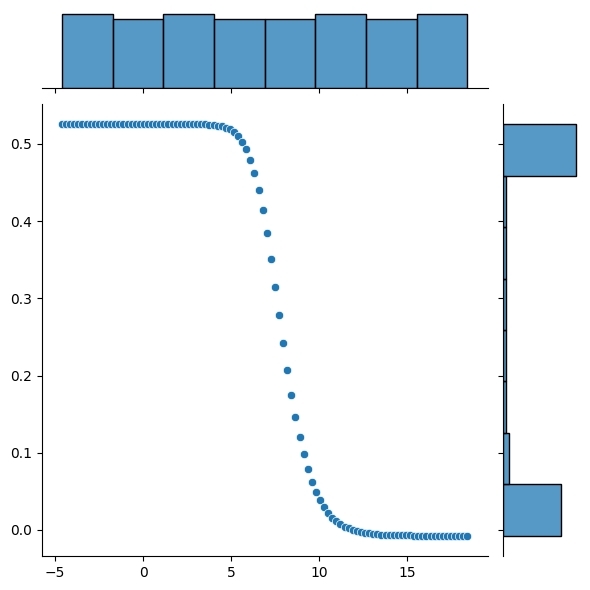

In [ ]:
#### creating jointplot between 'np.log(param_range)' and 'test_mean'
sns.jointplot(x=np.log(param_range),y=test_mean)

In [ ]:
np.where(test_mean==max(test_mean))  ### getting array

(array([28]),)

In [ ]:
param_range[28] #### getting value of param_range

6.7341506577508214

In [ ]:
lm_r_best=Ridge(alpha=param_range[28]) #### getting best model from ridge regression

In [ ]:
lm_r_best.fit(x_train_s,y_train) ### fitting x_train and y_train on ridge regression

Ridge(alpha=6.7341506577508214)

In [ ]:
r2_score(y_test,lm_r_best.predict(x_test_s)) ### getting value of r2_score from ridge regression of test

0.5364579036420947

In [ ]:
r2_score(y_train,lm_r_best.predict(x_train_s)) #### getting value of r2_score from ridge regression of train

0.5334897646005574

In [ ]:
### Finding MSE value for linear regression
mean_squared_error(y_test, y_test_a, squared=False)

8291.641811462556

###**Key Values of Ridge**:

1.   The r2_score value of test data is 0.536
2.   r2_score value of train data is 0.533
3.   mean_squared_error value of test data is 8291.64
###Key Values of Ridge with hyperparameter:
1.   The r2_score value of test data is 0.536
2.   r2_score value of train data is 0.533
3.   mean_squared_error value of test data is 8291.64







*Lasso*

In [ ]:
from sklearn.linear_model import Lasso ### importing lasso from sklearn
lasso = (Lasso(alpha=1.0))             ### creating lasso object

In [ ]:
lasso.fit(x_train, y_train)            ### fitting x_train and y_train on lasso regression

Lasso()

In [ ]:
y_pred = lasso.predict(x_test) ### predicting y value from x_test data

In [ ]:
y_pred_train = lasso.predict(x_train) ### predicting y value from x_train data

In [ ]:
y_pred ### predicting values of y

array([69072.39716352, 64190.93496495, 63665.64449733, 71992.008636  ,
       76693.82777331, 88791.19021545, 69212.66290169, 71356.19274913,
       70946.45551329, 73638.39825601, 72260.00311212, 78622.34491173,
       85445.40410268, 78144.76584581, 77097.32210663, 94041.84457433,
       66345.54976791, 69001.67808518, 67239.72436689, 81840.55287612,
       91213.2786312 , 96643.08825037, 71194.64570996, 67446.46842045,
       72582.18439138, 68268.95976531, 73630.88765749, 94585.36394433,
       72138.50935361, 74404.37526911, 68974.63431886, 69923.74904844,
       85489.58642633, 80588.10473983, 98776.74227305, 80366.97088304,
       71355.5162415 , 80770.94907014, 74027.84971391, 65763.44132056,
       71482.43023741, 87911.42317044, 73025.73121857, 67815.34398628,
       74971.47415273, 78226.92307442, 86525.68289645, 68131.26634147,
       69450.29320416, 76668.85787587, 90202.70719652, 69736.20860453,
       91623.2833286 , 73116.97407539, 89885.65093181, 69459.69697946,
      

In [ ]:
print("slope: %.2f" % lasso.coef_[0]) ### printing slope coeficient

slope: 0.43


In [ ]:
print("intercept: %2f" % lasso.intercept_)  ### printing intercept

intercept: 35609.886702


In [ ]:
from sklearn.metrics import mean_squared_error  #### importing mean_squared_error from sklearn
mean_squared_error(y_test,y_pred)               #### getting mean_squared_error value

68752222.39085852

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))     #### getting squareroot of mean_squared_error

8291.69599001667

In [ ]:
print("Rsquared: %.2f" % lasso.score(x_test,y_test)) #### getting value of r2

Rsquared: 0.54


In [ ]:
r2_score(y_test, y_pred) #### getting value of r2_score from Lasso regression of train

0.5366614212193204

In [ ]:
r2_score(y_train,y_pred_train)   ### getting value of r2 from y_pred_train

0.5335036489240834

###Key values of Lasso Regression:
1.   The r2_score value of test data is 0.536
2.   r2_score value of train data is 0.533
3.   mean_squared_error value of test data is 8291.69
